In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [3]:
def calculate_signal(df, col, target_col):

    _ =df.groupby(col,dropna=False, observed=0).agg(
        count=(target_col,np.size),
        signal=(target_col,"sum")
    )
    _.rename(columns={"signal":target_col},inplace=True)
    _["count_pct"] = _["count"].div(_["count"].sum()).mul(100)
    _[f"{target_col}_pct"] = _[f"{target_col}"].div(_[f"{target_col}"].sum()).mul(100)
    _[f"{target_col}_rate"] = _[f"{target_col}"].div(_["count"]).mul(100)

    return _

In [4]:
def plot_bar_and_line(df, target_col, rotation=0):

    _ = df
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    x_ticks = _.index.astype(str)
    title = f"Histogram & {target_col} of {_.index.name}"

    def func(ax, word):

        ax.bar(x_ticks, _[word])
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticks, rotation=rotation)
        ax.set_xlabel(_.index.name)
        ax.set_ylabel(word, loc="center")
        ax.set_title(title)

        ax2 = ax.twinx()
        ax2.plot(x_ticks, _[target_col], color='red')
        ax2.set_ylabel(target_col, loc="bottom")

    func(ax[0], "count")
    func(ax[1], "count_pct")

    plt.show()


In [6]:
df = pd.read_csv('../toydata/titanic.csv')
print(f"{df.shape}")
df.head(1)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


### calcs

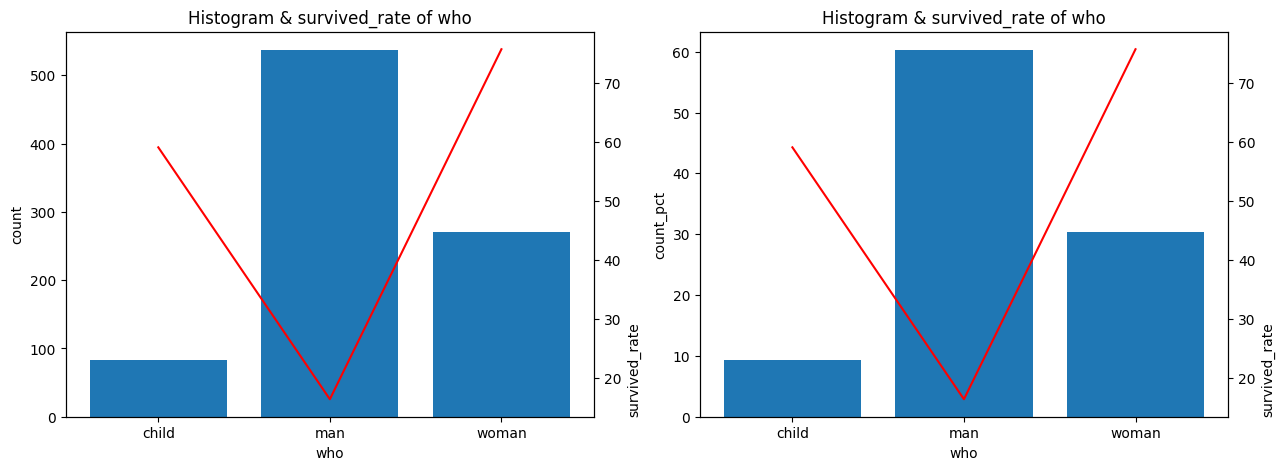

,count,survived,count_pct,survived_pct,survived_rate
who,,,,,
child,83,49,9.32,14.33,59.04
man,537,88,60.27,25.73,16.39
woman,271,205,30.42,59.94,75.65


In [218]:
_ = calculate_signal(df, target_col = "survived", col = "who")
plot_bar_and_line(_, target_col = "survived_rate", rotation=0)
_.round(2)


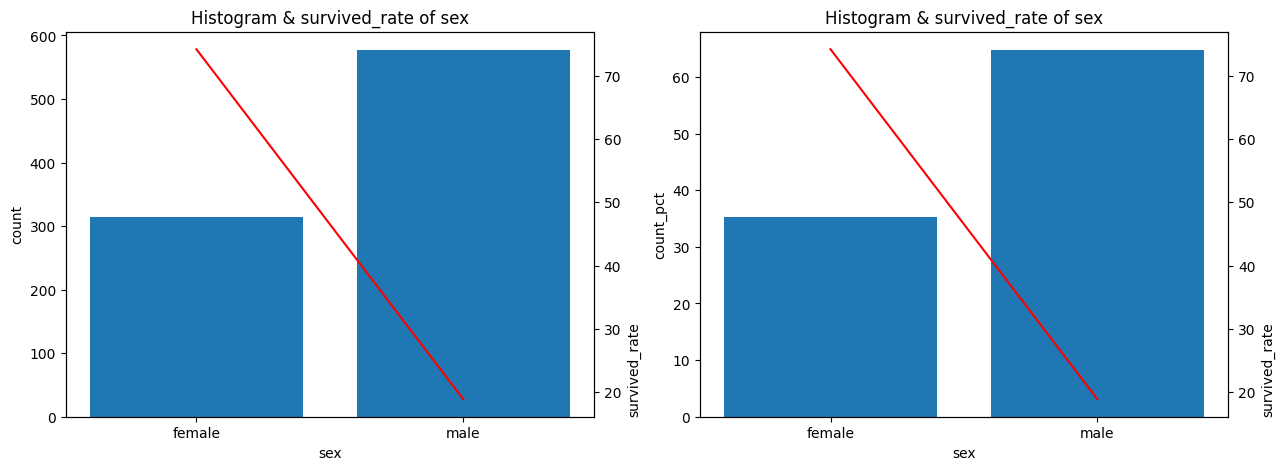

,count,survived,count_pct,survived_pct,survived_rate
sex,,,,,
female,314,233,35.24,68.13,74.20
male,577,109,64.76,31.87,18.89


In [219]:
_ = calculate_signal(df, target_col = "survived", col = "sex")
plot_bar_and_line(_, target_col = "survived_rate", rotation=0)
_.round(2)


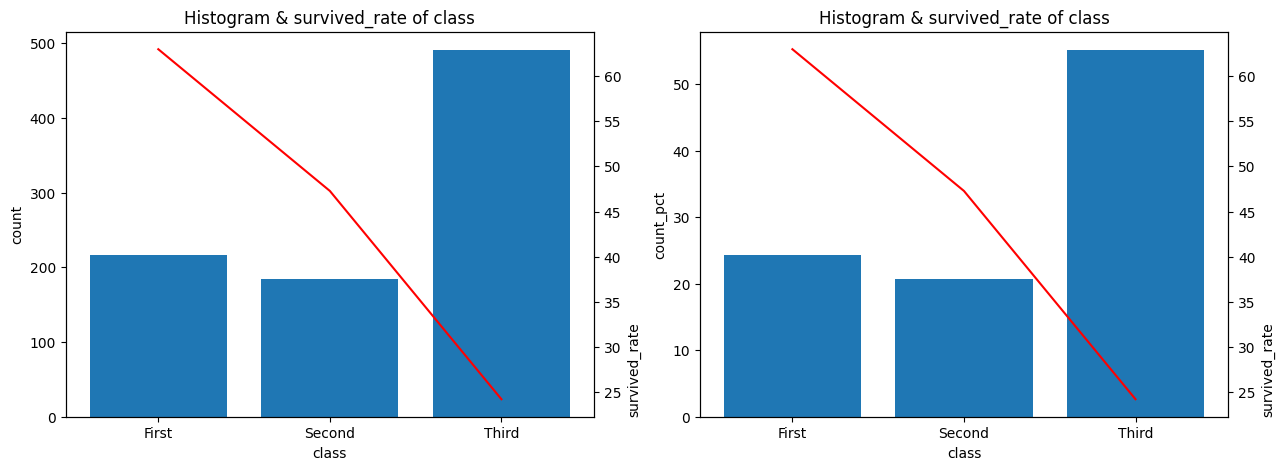

,count,survived,count_pct,survived_pct,survived_rate
class,,,,,
First,216,136,24.24,39.77,62.96
Second,184,87,20.65,25.44,47.28
Third,491,119,55.11,34.80,24.24


In [ ]:
_ = calculate_signal(df, target_col = "survived", col = "class")
plot_bar_and_line(_, target_col = "survived_rate", rotation=0)
_.round(2)


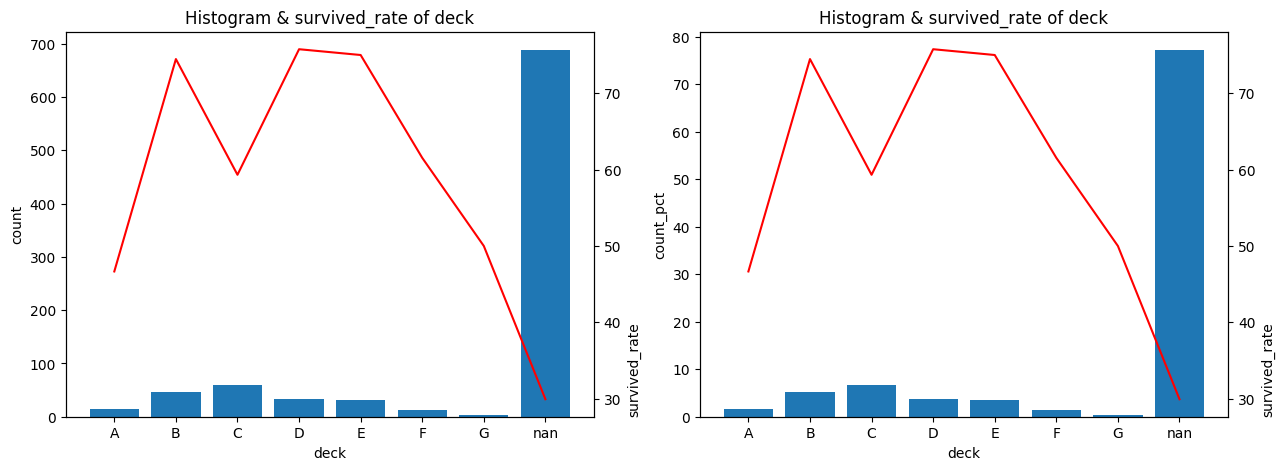

,count,survived,count_pct,survived_pct,survived_rate
deck,,,,,
A,15,7,1.68,2.05,46.67
B,47,35,5.27,10.23,74.47
C,59,35,6.62,10.23,59.32
D,33,25,3.70,7.31,75.76
E,32,24,3.59,7.02,75.00
F,13,8,1.46,2.34,61.54
G,4,2,0.45,0.58,50.00
NaN,688,206,77.22,60.23,29.94


In [191]:
_ = calculate_signal(df, target_col = "survived", col = "deck")
plot_bar_and_line(_, target_col = "survived_rate", rotation=0)
_.round(2)


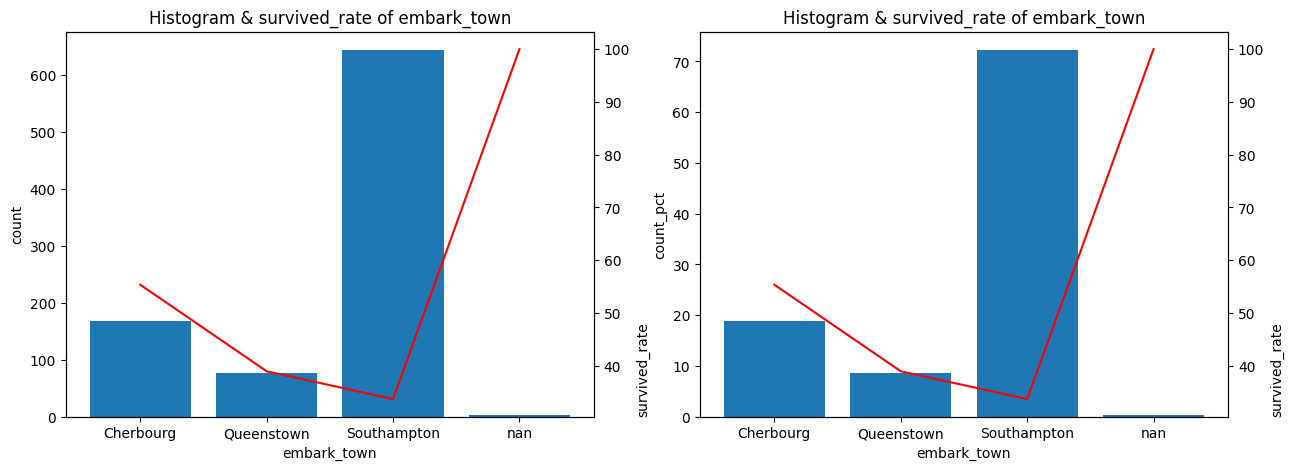

,count,survived,count_pct,survived_pct,survived_rate
embark_town,,,,,
Cherbourg,168,93,18.86,27.19,55.36
Queenstown,77,30,8.64,8.77,38.96
Southampton,644,217,72.28,63.45,33.70
NaN,2,2,0.22,0.58,100.00


In [220]:
_ = calculate_signal(df, target_col = "survived", col = "embark_town")
plot_bar_and_line(_, target_col = "survived_rate", rotation=0)
_.round(2)


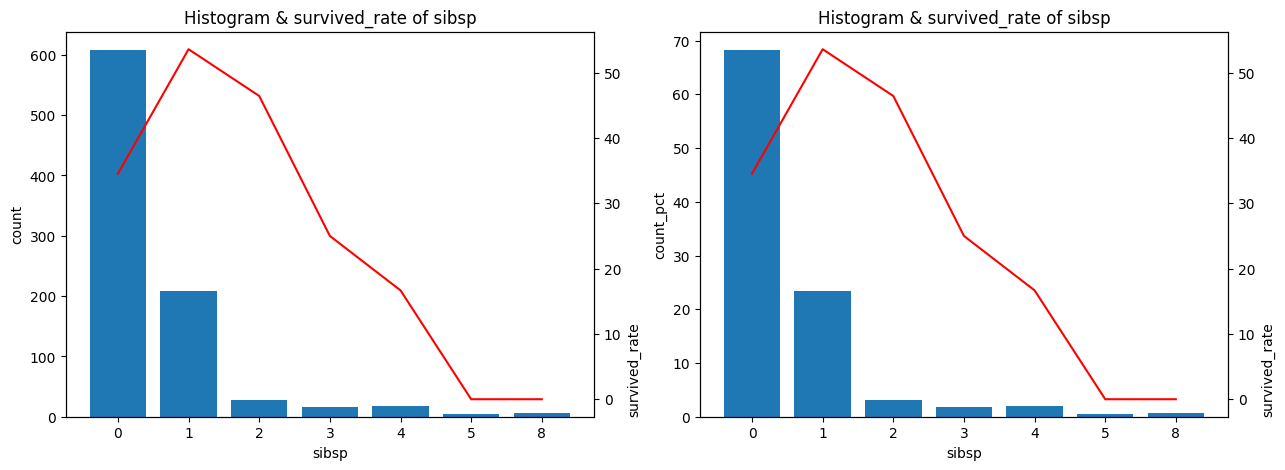

,count,survived,count_pct,survived_pct,survived_rate
sibsp,,,,,
0,608,210,68.24,61.40,34.54
1,209,112,23.46,32.75,53.59
2,28,13,3.14,3.80,46.43
3,16,4,1.80,1.17,25.00
4,18,3,2.02,0.88,16.67
5,5,0,0.56,0.00,0.00
8,7,0,0.79,0.00,0.00


In [221]:
_ = calculate_signal(df, target_col = "survived", col = "sibsp")
plot_bar_and_line(_, target_col = "survived_rate", rotation=0)
_.round(2)


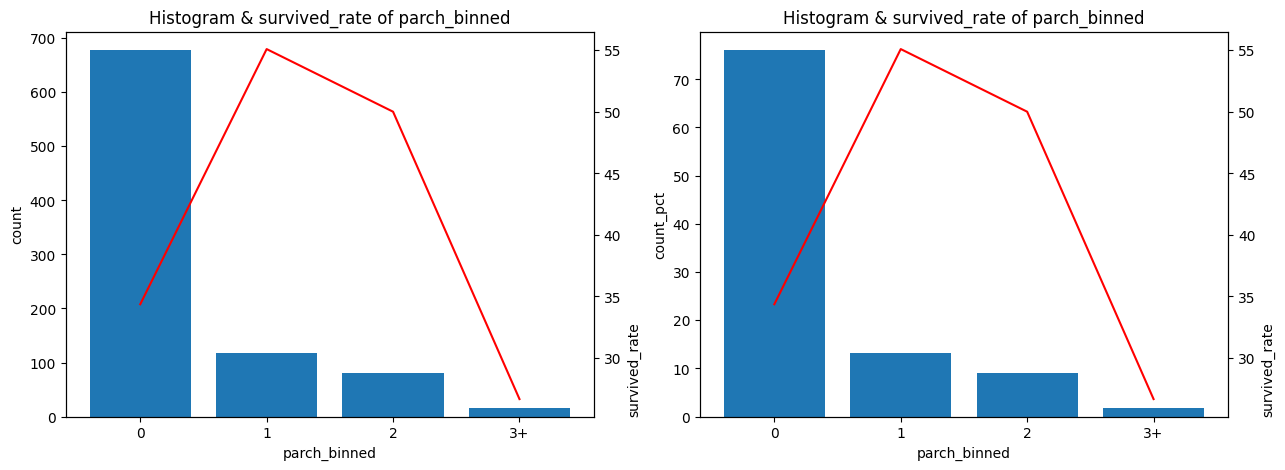

,count,survived,count_pct,survived_pct,survived_rate
parch_binned,,,,,
0,678,233,76.09,68.13,34.37
1,118,65,13.24,19.01,55.08
2,80,40,8.98,11.70,50.00
3+,15,4,1.68,1.17,26.67


In [223]:
idx = df.eval("parch >= 3")
df["parch_binned"] = df["parch"].astype(str)
df.loc[idx,"parch_binned"] = "3+"
_ = calculate_signal(df, target_col = "survived", col = "parch_binned")
plot_bar_and_line(_, target_col = "survived_rate", rotation=0)
_.round(2)


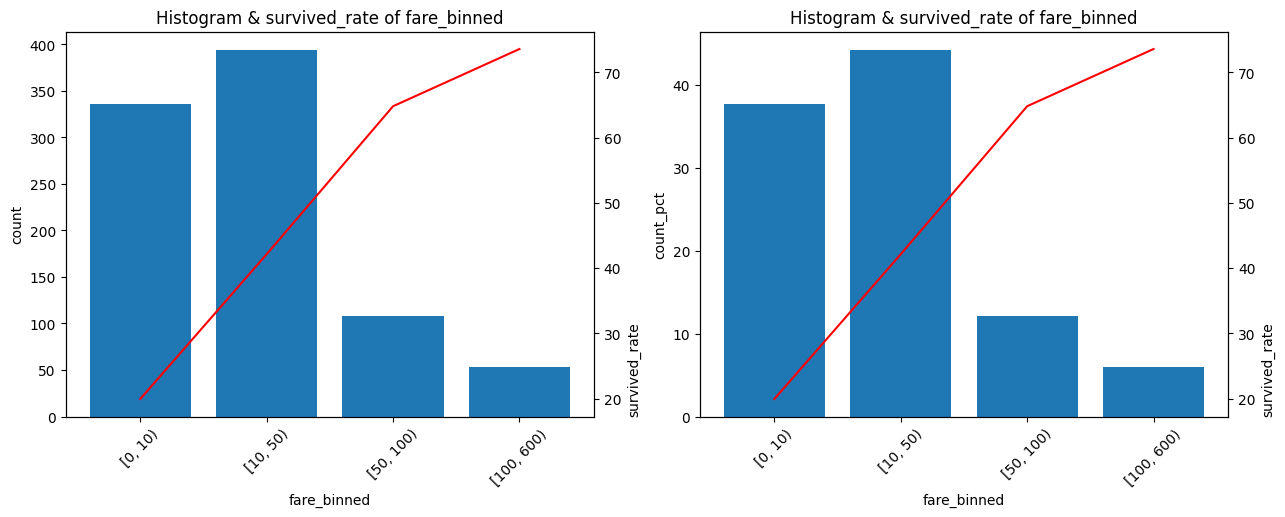

,count,survived,count_pct,survived_pct,survived_rate
fare_binned,,,,,
"[0, 10)",336,67,37.71,19.59,19.94
"[10, 50)",394,166,44.22,48.54,42.13
"[50, 100)",108,70,12.12,20.47,64.81
"[100, 600)",53,39,5.95,11.40,73.58


In [8]:
edges = np.histogram_bin_edges(df["fare"].dropna(), bins = [0,10,50,100,600])
df["fare_binned"] = pd.cut(df["fare"], bins=edges, right=False)
_ = calculate_signal(df, target_col = "survived", col = "fare_binned")
plot_bar_and_line(_, target_col = "survived_rate", rotation=45)
_.round(2)

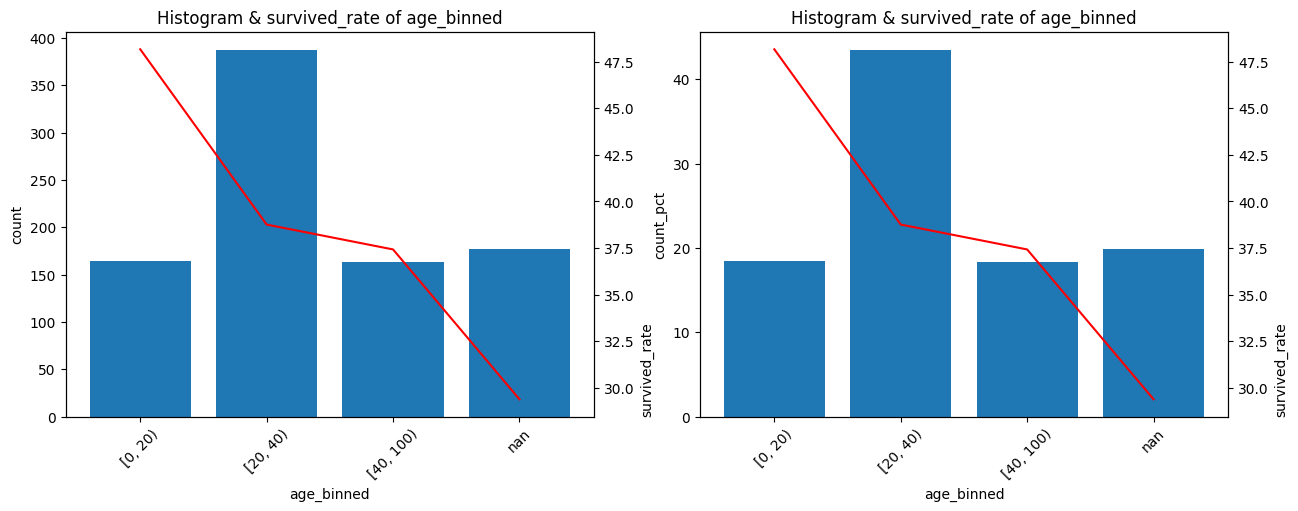

,count,survived,count_pct,survived_pct,survived_rate
age_binned,,,,,
"[0.0, 20.0)",164,79,18.41,23.10,48.17
"[20.0, 40.0)",387,150,43.43,43.86,38.76
"[40.0, 100.0)",163,61,18.29,17.84,37.42
NaN,177,52,19.87,15.20,29.38


In [30]:
edges = [0,20,40,100]
df["age_binned"] = pd.cut(df["age"], bins=edges, right=False)
_ = calculate_signal(df, target_col = "survived", col = "age_binned")
plot_bar_and_line(_, target_col = "survived_rate", rotation=45)
_.round(2)